<a href="https://colab.research.google.com/github/AyushMaria/Vortex-Detection/blob/main/Visualizing_our_image_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as font_manager
from pandas.plotting import scatter_matrix
from datetime import datetime,timedelta
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from google.colab import drive

In [2]:
mount='/content/gdrive'
drive.mount(mount, force_remount=True)

Mounted at /content/gdrive


In [3]:
drive_root=mount + '/My Drive/Colab Notebooks/Object Detection'
%cd $drive_root
%pwd

/content/gdrive/My Drive/Colab Notebooks/Object Detection


'/content/gdrive/My Drive/Colab Notebooks/Object Detection'

In [4]:
df=pd.read_csv('adaboost.csv')
df.head()

,ID,contourArea,areaPercDiff,aspectRatio,momentLocDiff,label
0,1,283.5,67.500000,0.952381,28.491470,vortex
1,2,2281.5,52.388060,1.030769,24.713409,vortex
2,3,1177.0,53.891941,1.238095,24.540352,vortex
3,4,2285.0,32.503556,0.778947,51.181107,no_vortex
4,5,3155.5,63.490946,1.014286,51.263397,vortex


In [5]:
fig = px.line(df, x="ID", y="contourArea", title="Contour Area variation")
fig.show()

In [6]:
fig = go.Figure()
v = df['ID']
w = df['contourArea']
x = df['areaPercDiff']
y = df['aspectRatio']
z = df['momentLocDiff']
a = df['label']
fig.add_trace(go.Scatter(x=v,y=w,name="Contour Areas",line = dict(color='blue',width=4)))
fig.add_trace(go.Scatter(x=v,y=x,name="Area Percentage Difference",line = dict(color='red',width=4)))
fig.add_trace(go.Scatter(x=v,y=y,name="Aspect Ratio",line = dict(color='green',width=4,dash='dash')))
fig.add_trace(go.Scatter(x=v,y=w,name="Moment Difference",line = dict(color='yellow',width=4,dash='dot')))
fig.update_layout(title='Image Features',xaxis_title='ID',yaxis_title='Features')
fig.show()

In [7]:
# bar plot

fig=px.bar(df, x="ID", y="contourArea", color="label", title="Contour Area variation as per labels")
fig.show()

In [8]:
# bar plot
fig=px.bar(df, x="ID", y="areaPercDiff", color="label", title="Areaperc variation as per labels")
fig.show()

In [11]:
#Area Plot
fig=px.area(df, x="ID", y="areaPercDiff", color="label", title="Area plot for contour area variation as per labels")
fig.show()

In [10]:
# scatter plot

w = df['contourArea']
x = df['areaPercDiff']
y = df['aspectRatio']
z = df['momentLocDiff']
a = df['label']

fig=px.scatter(df,x=x,y=y,color=a,size=w,hover_data=['momentLocDiff'],title="Scatter Plot of Image Features")
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Vortex:  25
Non - Vortex:  11


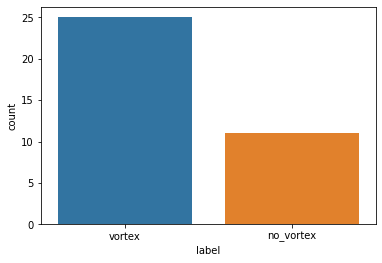

In [ ]:
y=df['label']
X = df[['contourArea','areaPercDiff','aspectRatio','momentLocDiff']]
z = df['areaPercDiff']
ax=sns.countplot(y,label='count')
V,NV = y.value_counts()
print('Vortex: ',V)
print('Non - Vortex: ',NV)

In [ ]:
X.head()

,contourArea,areaPercDiff,aspectRatio,momentLocDiff
0,283.5,67.500000,0.952381,28.491470
1,2281.5,52.388060,1.030769,24.713409
2,1177.0,53.891941,1.238095,24.540352
3,2285.0,32.503556,0.778947,51.181107
4,3155.5,63.490946,1.014286,51.263397


In [ ]:
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())             
data = pd.concat([y,data_n_2.iloc[:,]],axis=1)
data = pd.melt(data,id_vars="label",var_name="features", value_name='value')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

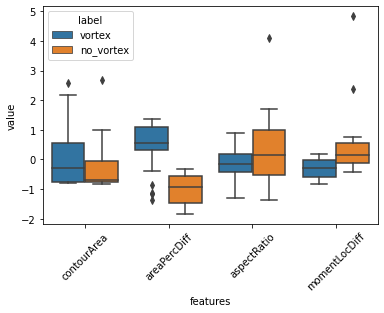

In [ ]:
sns.boxplot(x="features", y="value", hue="label", data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

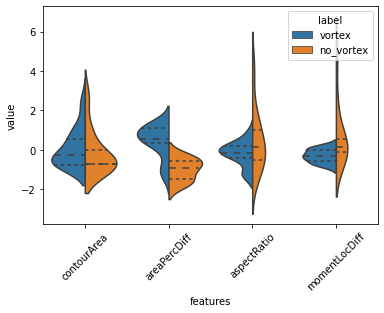

In [ ]:
sns.violinplot(x="features", y="value", hue="label", data=data,split=True, inner="quart")
plt.xticks(rotation=45)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



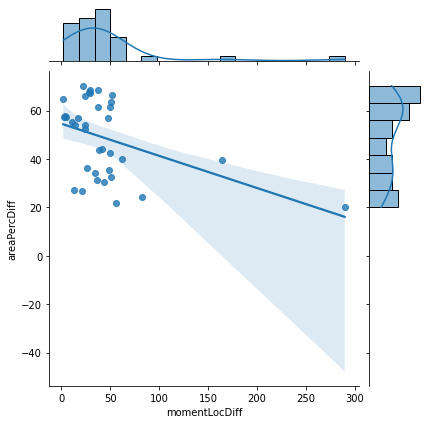

In [ ]:
sns.jointplot(X.loc[:,'momentLocDiff'],X.loc[:,'areaPercDiff'],kind="reg");
#sns.jointplot(df,x="areaPercDiff",y="aspectRatio",kind="kde");

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

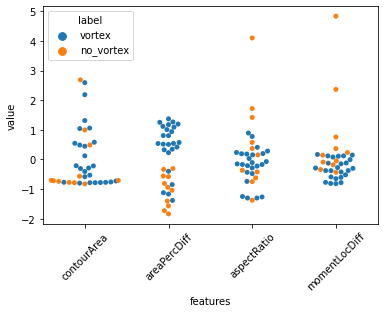

In [ ]:
sns.swarmplot(x="features", y="value", hue="label", data=data)
plt.xticks(rotation=45)

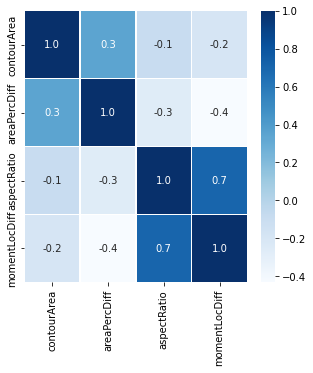

In [ ]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='Blues');